<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/Asia%20University%20Course/Final_Project_Stock_06_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX_Stock.csv to NFLX_Stock.csv


In [15]:
# Store the data into a data frame
df = pd.read_csv('NFLX_Stock.csv')
df.head(6)

,Date,Open Price,Close Price,Adj Close Price,Volume
0,2021-12-20,586.429993,593.739990,593.739990,3358400
1,2021-12-21,597.539978,604.919983,604.919983,2319400
2,2021-12-22,603.359985,614.239990,614.239990,2335700
3,2021-12-23,616.400024,614.090027,614.090027,1621100
4,2021-12-27,615.000000,613.119995,613.119995,2061500
5,2021-12-28,614.950012,610.710022,610.710022,1882800


In [16]:
# Get the number of trading days
df.shape

(251, 5)

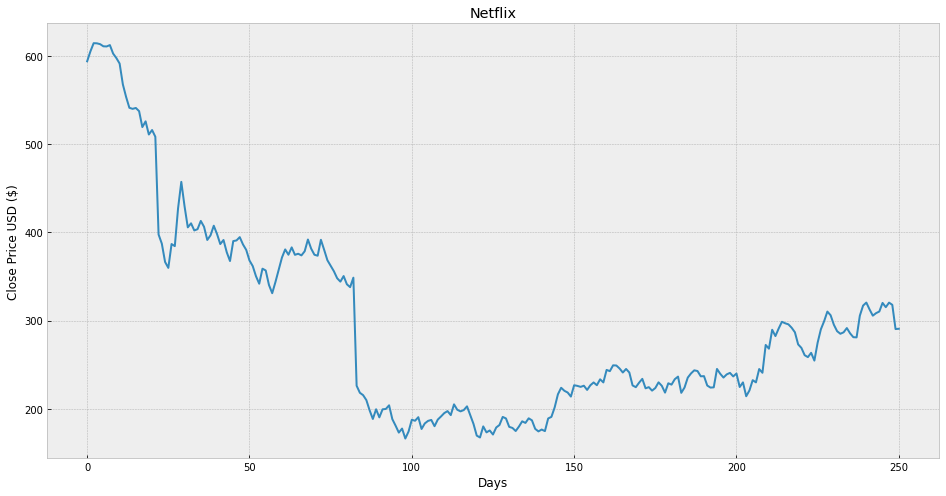

In [19]:
# Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.show()

In [20]:
# Get the close price
df = df[['Close Price']]
df.head(4)

,Close Price
0,593.739990
1,604.919983
2,614.239990
3,614.090027


In [25]:
# Create a variable to predict 'x' days out into the future
future_days = 25

# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close Price']].shift(-future_days)
df.tail(4)

,Close Price,Prediction
247,320.339996,NaN
248,317.829987,NaN
249,290.410004,NaN
250,290.709991,NaN


In [26]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[593.73999 ]
 [604.919983]
 [614.23999 ]
 [614.090027]
 [613.119995]
 [610.710022]
 [610.539978]
 [612.090027]
 [602.440002]
 [597.369995]
 [591.150024]
 [567.52002 ]
 [553.289978]
 [541.059998]
 [539.849976]
 [540.840027]
 [537.219971]
 [519.200012]
 [525.690002]
 [510.799988]
 [515.859985]
 [508.25    ]
 [397.5     ]
 [387.149994]
 [366.420013]
 [359.700012]
 [386.700012]
 [384.359985]
 [427.140015]
 [457.130005]
 [429.480011]
 [405.600006]
 [410.170013]
 [402.100006]
 [403.529999]
 [412.890015]
 [406.269989]
 [391.309998]
 [396.570007]
 [407.459991]
 [398.079987]
 [386.670013]
 [391.290009]
 [377.380005]
 [367.459991]
 [390.029999]
 [390.799988]
 [394.519989]
 [386.23999 ]
 [380.029999]
 [368.070007]
 [361.730011]
 [350.26001 ]
 [341.76001 ]
 [358.790009]
 [356.769989]
 [340.320007]
 [331.01001 ]
 [343.75    ]
 [357.529999]
 [371.399994]
 [380.600006]
 [374.589996]
 [382.920013]
 [374.48999 ]
 [375.709991]
 [373.850006]
 [378.51001 ]
 [391.820007]
 [381.470001]
 [374.589996]
 [373.

<ipython-input-26-bcfeb313f00b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [27]:
# Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[359.700012 386.700012 384.359985 427.140015 457.130005 429.480011
 405.600006 410.170013 402.100006 403.529999 412.890015 406.269989
 391.309998 396.570007 407.459991 398.079987 386.670013 391.290009
 377.380005 367.459991 390.029999 390.799988 394.519989 386.23999
 380.029999 368.070007 361.730011 350.26001  341.76001  358.790009
 356.769989 340.320007 331.01001  343.75     357.529999 371.399994
 380.600006 374.589996 382.920013 374.48999  375.709991 373.850006
 378.51001  391.820007 381.470001 374.589996 373.470001 391.5
 380.149994 368.350006 362.149994 355.880005 348.       344.100006
 350.429993 341.130005 337.859985 348.609985 226.190002 218.220001
 215.520004 209.910004 198.399994 188.539993 199.520004 190.360001
 199.460007 199.869995 204.009995 188.320007 180.970001 173.100006
 177.660004 166.369995 174.309998 187.639999 186.509995 190.559998
 177.190002 183.479996 186.350006 187.440002 180.339996 187.830002
 191.399994 195.190002 197.440002 192.910004 205.089996 198.979996
 

In [28]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [37]:
# Get the last 'x' rows of the future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-37-50b62dee84c5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[224.75    ],
       [229.979996],
       [214.289993],
       [220.869995],
       [232.509995],
       [230.      ],
       [245.100006],
       [240.860001],
       [272.380005],
       [268.160004],
       [289.570007],
       [282.450012],
       [291.019989],
       [298.619995],
       [296.940002],
       [295.720001],
       [291.880005],
       [286.75    ],
       [273.      ],
       [269.059998],
       [260.790009],
       [258.600006],
       [263.459991],
       [254.660004],
       [274.970001]])

In [38]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[290.130005 299.269989 310.200012 236.729996 218.130005 287.980011
 285.049988 286.690002 310.26001  285.540009 281.170013 280.959991
 305.529999 316.950012 320.410004 320.410004 305.529999 308.420013
 310.26001  320.01001  315.179993 320.339996 317.829987 290.410004
 290.709991]

[235.86422503 238.3020239  230.98862029 234.05568219 239.48130371
 238.31134814 245.34974312 243.37339755 258.06546045 256.09843912
 266.07804162 262.7592789  266.75390533 270.29641015 269.51333402
 268.94466875 267.15477486 264.76358366 258.3544517  256.51794314
 252.66314672 251.6423454  253.90767523 249.80583684 259.27270599]


<ipython-input-39-41580ea8747c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


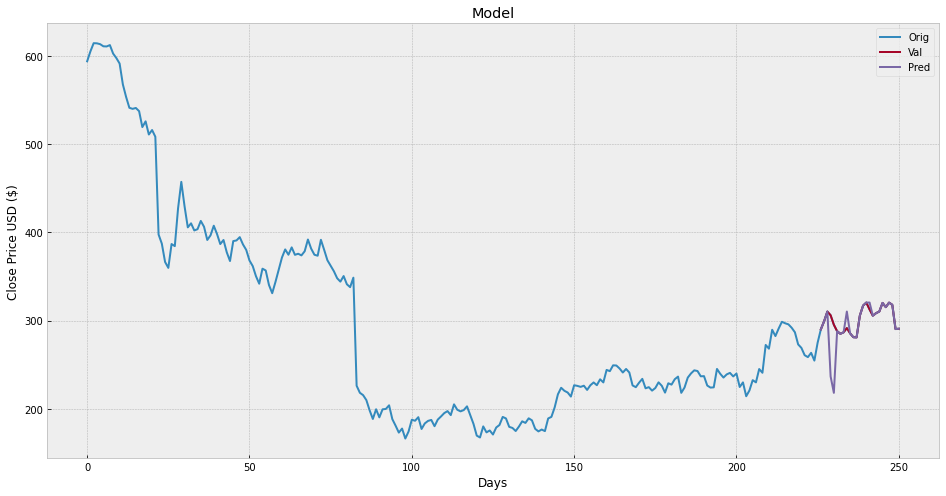

In [39]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-35-e8addfada0ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


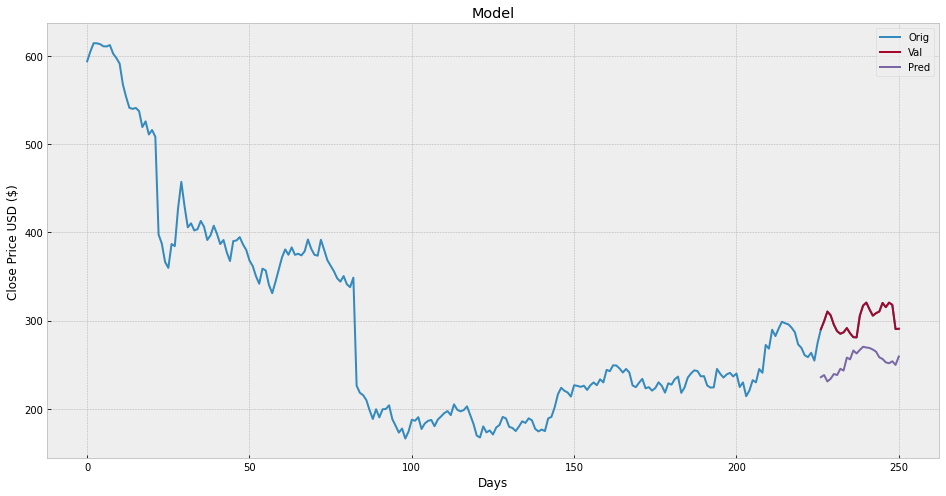

In [35]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()